In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') 

from bs4 import BeautifulSoup 
from urllib.request import Request, urlopen
from urllib.parse import unquote, quote_plus, urlencode

In [2]:
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
servicekey = 'QmnwzKg91T496WKWEYKjgb%2BHQChmcpkc7%2BDY46Q45S3wwbpYjuyIT5mlyv6h4nk5EPbZLDqniiR0KW1JAOUdxw%3D%3D'
decodekey = unquote(servicekey)

In [3]:
startCreateDt = 20200120
endCreateDt = 20220906

query_params = '?' + urlencode({
    quote_plus('serviceKey'): decodekey,
    quote_plus('startCreateDt'): startCreateDt,
    quote_plus('endCreateDt'): endCreateDt
})

URL = url + query_params

In [4]:
request = Request(URL)
page = urlopen(request).read()

In [5]:
soup = BeautifulSoup(page, 'html.parser')
parse = soup.find_all(['deathcnt', 'statedt'])  # decidecnt 태그와 statedt 태그 다 찾기

df_1 = []
for dt, cnt in zip(parse[1::2], parse[0::2]):
    df_1.append([dt.text, int(cnt.text)])  # 태그 안의 값은 ".text"를 통해 접근할 수 있음

df_1 = pd.DataFrame(df_1, columns=['날짜', '누적사망자'])
df_1 = df_1.sort_values(by='날짜').reset_index(drop=True) 
df_1['일별사망자'] = df_1['누적사망자'].diff()
df_1 = df_1.loc[1:].reset_index(drop=True)  # 맨 앞의 데이터는 지우기 (일별 확진자가 계산되지 않았기 때문에)
df_1['일별사망자'] = df_1['일별사망자'].astype(int)
df_1

,날짜,누적사망자,일별사망자
0,20200121,0,0
1,20200122,0,0
2,20200123,0,0
3,20200124,0,0
4,20200125,0,0
...,...,...,...
953,20220902,26940,64
954,20220903,27014,74
955,20220904,27093,79
956,20220905,27149,56


In [6]:
soup = BeautifulSoup(page, 'html.parser')
parse = soup.find_all(['decidecnt', 'statedt'])  # decidecnt 태그와 statedt 태그 다 찾기

df = []
for dt, cnt in zip(parse[1::2], parse[0::2]):
    df.append([dt.text, int(cnt.text)])  # 태그 안의 값은 ".text"를 통해 접근할 수 있음

df = pd.DataFrame(df, columns=['날짜', '누적확진자'])
df = df.sort_values(by='날짜').reset_index(drop=True) 
df['일별확진자'] = df['누적확진자'].diff()
df = df.loc[1:].reset_index(drop=True)  # 맨 앞의 데이터는 지우기 (일별 확진자가 계산되지 않았기 때문에)
df['일별확진자'] = df['일별확진자'].astype(int)
df

,날짜,누적확진자,일별확진자
0,20200121,1,0
1,20200122,1,0
2,20200123,1,0
3,20200124,2,1
4,20200125,2,0
...,...,...,...
953,20220902,23417217,89564
954,20220903,23496949,79732
955,20220904,23569092,72143
956,20220905,23606640,37548


In [7]:
df_InfState = pd.merge(df, df_1)
df_InfState

,날짜,누적확진자,일별확진자,누적사망자,일별사망자
0,20200121,1,0,0,0
1,20200122,1,0,0,0
2,20200123,1,0,0,0
3,20200124,2,1,0,0
4,20200125,2,0,0,0
...,...,...,...,...,...
953,20220902,23417217,89564,26940,64
954,20220903,23496949,79732,27014,74
955,20220904,23569092,72143,27093,79
956,20220905,23606640,37548,27149,56


In [8]:
df_InfState['날짜'] = pd.to_datetime(df_InfState['날짜'])

In [9]:
df_InfState.dtypes

날짜       datetime64[ns]
누적확진자             int64
일별확진자             int32
누적사망자             int64
일별사망자             int32
dtype: object

In [10]:
df_InfState

,날짜,누적확진자,일별확진자,누적사망자,일별사망자
0,2020-01-21,1,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-23,1,0,0,0
3,2020-01-24,2,1,0,0
4,2020-01-25,2,0,0,0
...,...,...,...,...,...
953,2022-09-02,23417217,89564,26940,64
954,2022-09-03,23496949,79732,27014,74
955,2022-09-04,23569092,72143,27093,79
956,2022-09-05,23606640,37548,27149,56


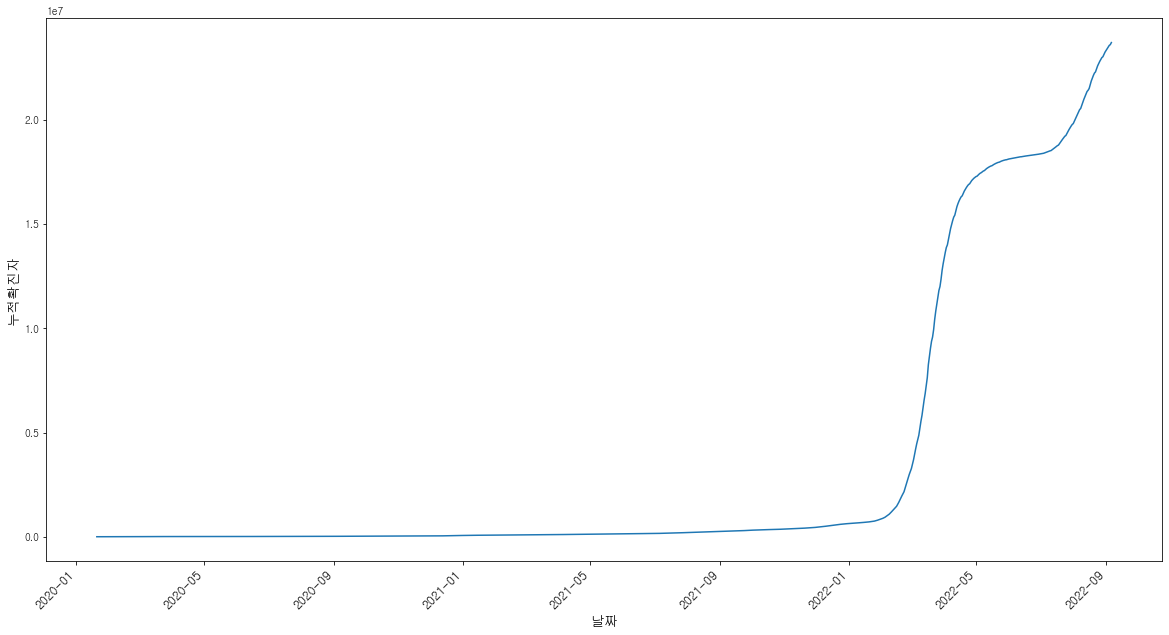

In [11]:
plt.rcParams['font.family'] ='gulim'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 14
plt.figure(figsize=(20,10))
sns.lineplot(x='날짜', y='누적확진자',data=df_InfState)
plt.xticks(size=12,rotation=45, horizontalalignment='right')
plt.ylabel('누적확진자',size=14)
plt.xlabel('날짜',size=14)
plt.show()

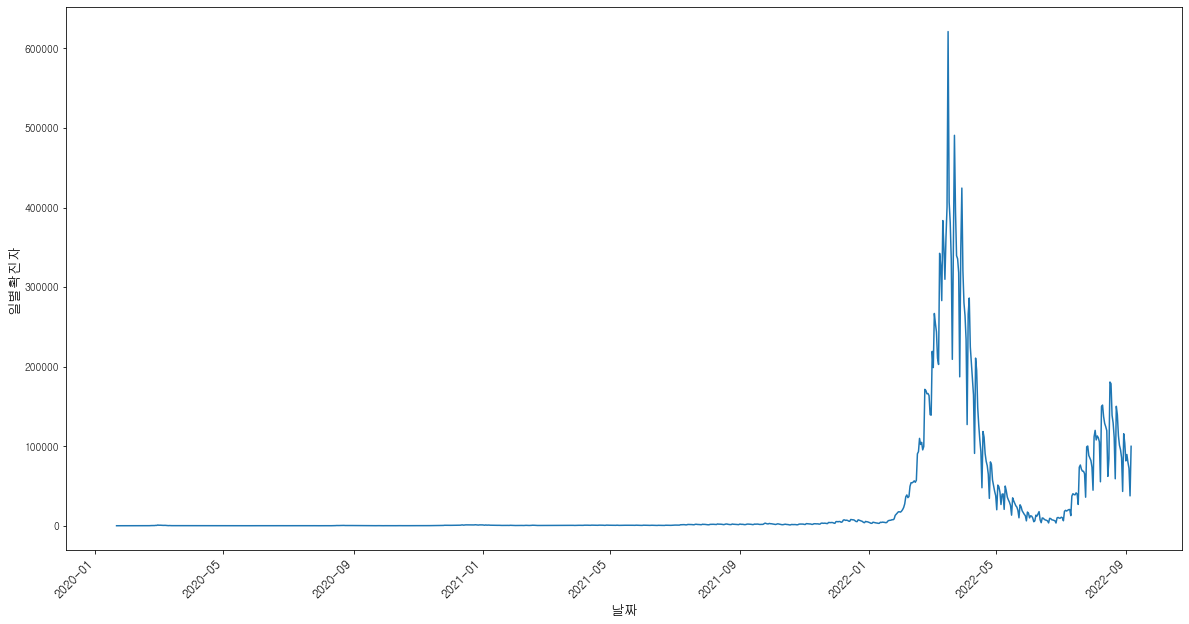

In [12]:
plt.figure(figsize=(20,10))
sns.lineplot(x='날짜', y='일별확진자',data=df_InfState)
plt.xticks(size=12,rotation=45, horizontalalignment='right')
plt.ylabel('일별확진자',size=14)
plt.xlabel('날짜',size=14)
plt.show()

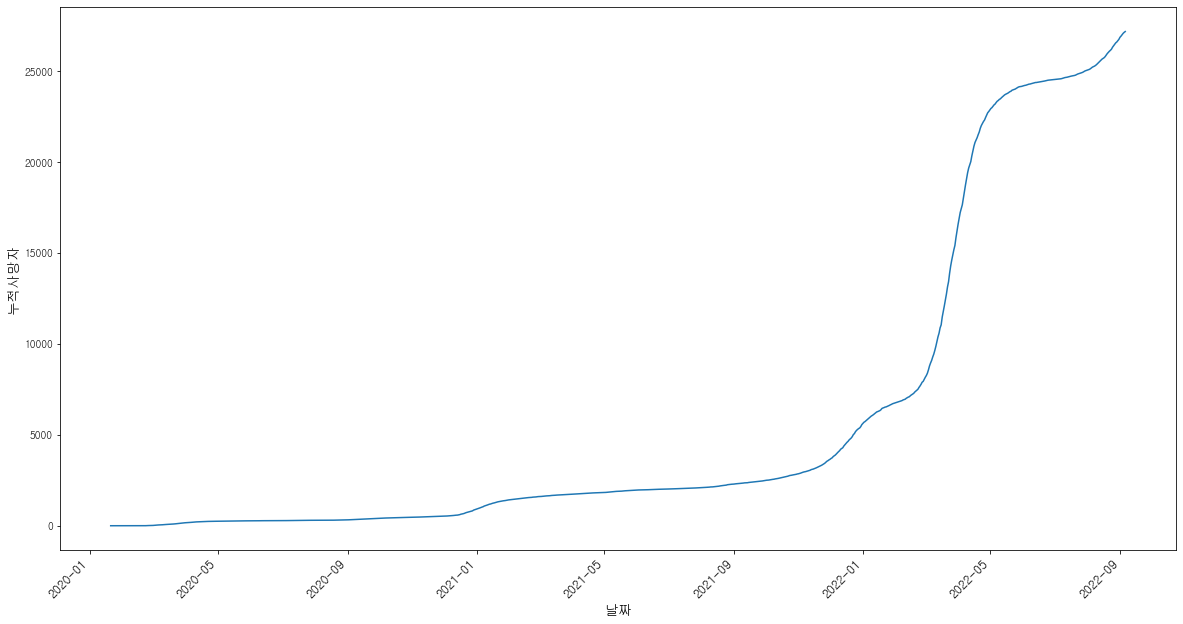

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(x='날짜', y='누적사망자',data=df_InfState)
plt.xticks(size=12,rotation=45, horizontalalignment='right')
plt.ylabel('누적사망자',size=14)
plt.xlabel('날짜',size=14)
plt.show()

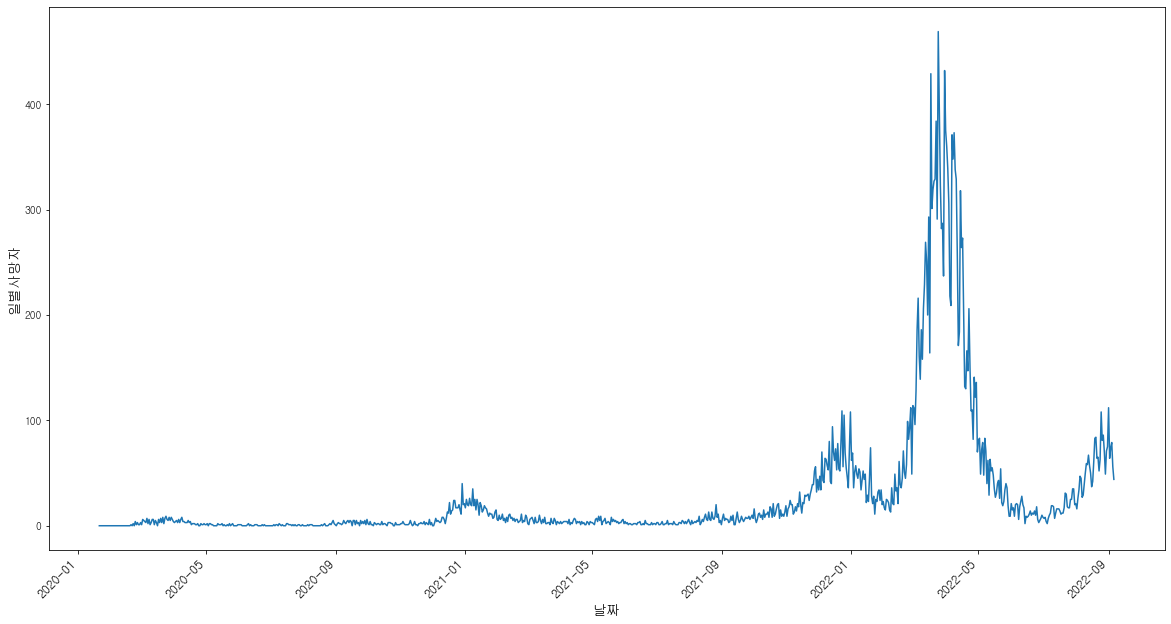

In [14]:
plt.figure(figsize=(20,10))
sns.lineplot(x='날짜', y='일별사망자',data=df_InfState)
plt.xticks(size=12,rotation=45, horizontalalignment='right')
plt.ylabel('일별사망자',size=14)
plt.xlabel('날짜',size=14)
plt.show()

In [15]:
df_InfState_long = pd.melt(df_InfState, id_vars=['날짜'], value_vars=['일별확진자', '일별사망자', '누적확진자', '누적사망자']).sort_values('날짜')
df_InfState_long

,날짜,variable,value
0,2020-01-21,일별확진자,0
958,2020-01-21,일별사망자,0
2874,2020-01-21,누적사망자,0
1916,2020-01-21,누적확진자,1
2875,2020-01-22,누적사망자,0
...,...,...,...
956,2022-09-05,일별확진자,37548
1915,2022-09-06,일별사망자,44
957,2022-09-06,일별확진자,99837
2873,2022-09-06,누적확진자,23706477


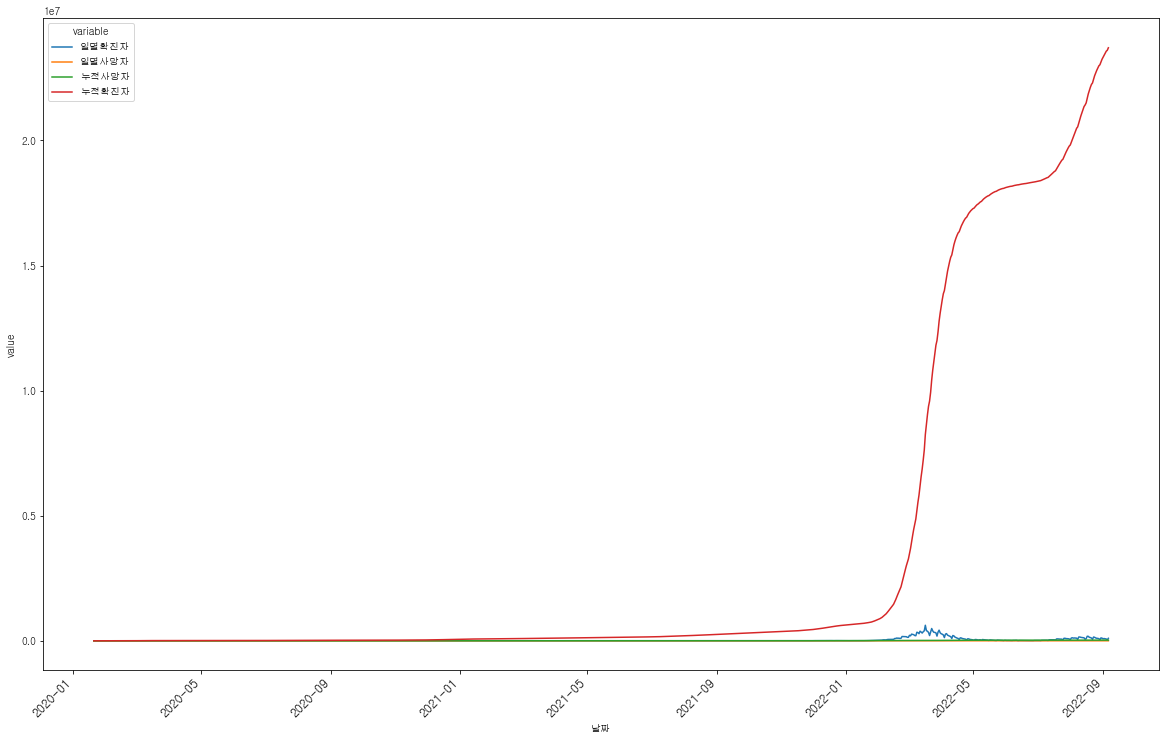

In [16]:
plt.figure(figsize=(20,12))
sns.lineplot('날짜', 'value', hue='variable', data=df_InfState_long)
plt.xticks(size=12,rotation=45, horizontalalignment='right')
plt.show()